## PR 2 SPSF
### 10219106 - Shafira Amaliyah

In [1]:
# import image module
from IPython.display import Image
  
# get the image
Image(url="Ilustrasi PR2 SPSF.jpg", width=300, height=300)

Sebuah partikel bermuatan q bergerak dengan kecepatan
$$ 
\vec{v(t)} = v_x(t)\hat{i} + v_y(t)\hat{j}
$$
dalam ruang bermedan magnetik konstan
$$
\vec{B}=-\hat{k}B_z
$$
Tentukan gerak partikel

#### a. Tuliskan hukum newtonnya

$$ \Sigma\vec{F}=m\vec{a} $$
$$ \Sigma\vec{F}=\vec{F_B}=m\frac{d\vec{v(t)}}{dt} $$

Gaya magnetik yang dialami partikel adalah  
$$ \vec{F_B}= q\vec{v}\times\vec{B} = q(v_x(t)\hat{i} + v_y(t)\hat{j})\times(-\hat{k}B_z) $$
$$ = q(-v_y(t) B_z \hat{i} + v_x(t) B_z \hat{j}) $$
sehingga diperoleh
$$ q(-v_y(t) B_z \hat{i} + v_x(t) B_z \hat{j})=m\frac{d\vec{v(t)}}{dt} $$
$$ q(-v_y(t) B_z \hat{i} + v_x(t) B_z \hat{j})=m\frac{d{v_x(t)\hat{i}}}{dt} + m\frac{d{v_y(t)\hat{j}}}{dt} $$

#### b. Tuliskan persamaan diferensial terkopel antara kecepatan pada kedua arah

Tinjau tiap komponen dari persamaan diferensial, sehingga diperoleh 
$$ \frac{-qB_z}{m}v_y(t)=\frac{dv_x(t)}{dt} $$
untuk arah $\hat{i}$, dan
$$ \frac{qB_z}{m}v_x(t)=\frac{dv_y(t)}{dt} $$
untuk arah $\hat{j}$

#### c. Selesaikan kedua persamaan diferensial sehingga dapat diperoleh $v_x(t), v_y(t), x(t), $ dan $y(t)$. Lakukan secara teori.

Turunkan persamaan arah $\hat{i}$
$$ \frac{d^{2}v_x(t)}{dt^{2}} =\frac{-qB_z}{m}\frac{dv_y(t)}{dt} $$
Substitusikan dengan persamaan arah $\hat{j}$
$$ \frac{d^{2}v_x(t)}{dt^{2}} =-\left(\frac{qB_z}{m}\right)^{2}v_x(t) $$
Dengan cara yang sama, diferensialkan persamaan arah $\hat{j}$ dan substitusikan dengan persamaan arah $\hat{i}$, sehingga diperoleh
$$ \frac{d^{2}v_y(t)}{dt^{2}} =\frac{qB_z}{m}\frac{dv_x(t)}{dt} $$
$$ \frac{d^{2}v_y(t)}{dt^{2}} =-\left(\frac{qB_z}{m}\right)^{2}v_y(t) $$

Sehingga diperoleh persamaan untuk sumbu x
$$ v_x(t) = k_1 \sin{\left(\frac{qB_z}{m}t\right)} + k_2 \cos{\left(\frac{qB_z}{m}t\right)}  $$atau$$  v_x(t) = A\sin{\left(\frac{qB_z}{m}t+\phi\right)} $$
dan untuk sumbu y
$$ v_y(t) = k_3 \sin{\left(\frac{qB_z}{m}t\right)} + k_4 \cos{\left(\frac{qB_z}{m}t\right)}  $$atau$$  v_y(t) = -A\cos{\left(\frac{qB_z}{m}t+\phi\right)} $$
dengan $A$ adalah amplitudo dan $\phi$ adalah beda fasa.

Kemudian untuk mencari $x(t)$ 
$$ x(t) = \frac{dv_x(t)}{dt} = \frac{d}{dt}[k_1 \sin{\left(\frac{qB_z}{m}t\right)} + k_2 \cos{\left(\frac{qB_z}{m}t\right)}] $$
$$ x(t) = k_1 \cos{\left(\frac{qB_z}{m}t\right)} - k_2 \sin{\left(\frac{qB_z}{m}t\right)} $$

dan untuk mencari $y(t)$ 
$$ y(t) = \frac{dv_y(t)}{dt} = \frac{d}{dt} [k_3 \sin{\left(\frac{qB_z}{m}t\right)} + k_4 \cos{\left(\frac{qB_z}{m}t\right)}]$$
$$ y(t) = k_3 \cos{\left(\frac{qB_z}{m}t\right)} - k_4 \sin{\left(\frac{qB_z}{m}t\right)}$$

Sebagai contoh, misal $A=20$, $\phi=0, q=1, B_z=1 T,$ dan $m=1 kg $, maka diperoleh grafik dari $v_x=10\sin{\left(t\right)}$ dan $v_y=-10\cos{\left(t\right)}$ 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

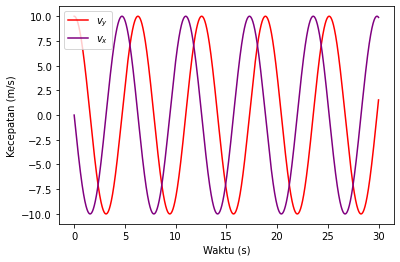

In [3]:
t=np.arange(0, 30, 0.001)

plt.figure()
plt.plot(t, 10*np.cos(t), color="red")
plt.plot(t, -10*np.sin(t), color="purple")
plt.xlabel('Waktu (s)')
plt.ylabel('Kecepatan (m/s)')
plt.legend(['$v_y$', '$v_x$'])

plt.show()

#### d. Perolehkan solusi numeriknya

Untuk memperoleh solusi numerik dengan metode Runge-Kutta orde-4
$$ \frac{dv_x(t)}{dt}=\frac{-qB_z}{m}v_y(t) $$
$$ \frac{dv_y(t)}{dt}=\frac{qB_z}{m}v_x(t) $$
dengan asumsi $ q=1,\ B_z=1 T,\ m=1kg $ 

In [4]:
# Rotasi partikel pada medan magnet menggunakan metode Runge-Kutta orde-4

# mendefinisikan Runge-Kutta Orde 4
def RungeKutta4(F,t,x,y,h): 
    k0 = h*F(t, x, y)
    k1 = h*F(t + h/2, x + k0/2, y)
    k2 = h*F(t + h/2, x + k1/2, y)
    k3 = h*F(t + h, x + k2, y)
    return (k0 + 2*k1 + 2*k2 + k3)/6

# mendefinisikan persamaan diferensial terkopel
def vx_dot(t, vx, vy, q=1, Bz=1, m=1):
    return -q*Bz/m*vy

def vy_dot(t, vy, vx, q=1, Bz=1, m=1):
    return q*Bz/m*vx

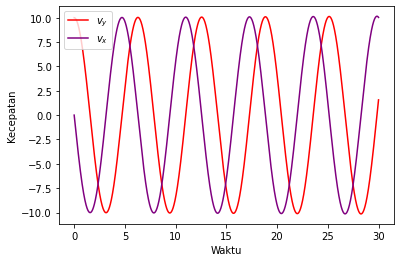

In [5]:
# mendefinisikan nilai parameter
vx_0 = 0
vy_0 = 10 
t0 = 0
tf = 30
h = 0.001

vxs=[vx_0]
vys=[vy_0]
ts=[t0]

while ts[-1] < tf:
    h = min(h, tf - ts[-1])
    vx = vxs[-1] + RungeKutta4(vx_dot,ts[-1],vxs[-1],vys[-1],h)
    vy = vys[-1] + RungeKutta4(vy_dot,ts[-1],vys[-1],vxs[-1],h)
    t = ts[-1] + h
    ts.append(t)
    vxs.append(vx)
    vys.append(vy)

#plot kecepatan pada kedua arah terhadap waktu
plt.figure()
plt.plot(ts, vys, color="red")
plt.plot(ts, vxs, color="purple")
plt.xlabel('Waktu')
plt.ylabel('Kecepatan')
plt.legend(['$v_y$', '$v_x$'])

plt.show()

#### e. Bandingkan hasil kedua pendekatan, teori dan numerik

Pendekatan teori dan numerik memiliki hasil yang sama